# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent? 

In [4]:
#1. 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

q1 = pd.read_csv('/Users/nguyen/Desktop/Spring 24/DS 3001/Data/Q1_clean.csv')
q1.head()
q1.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()

#Manhattan is the most expensive

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

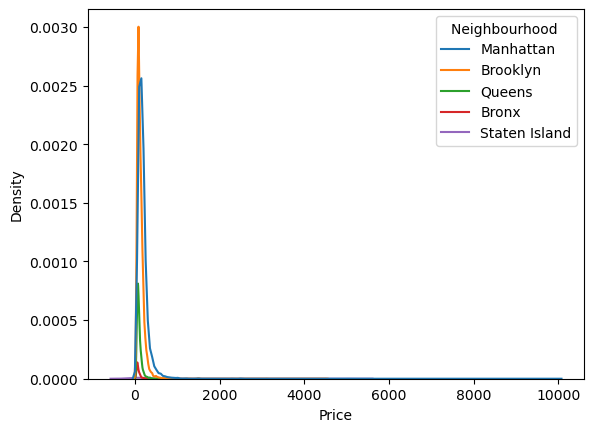

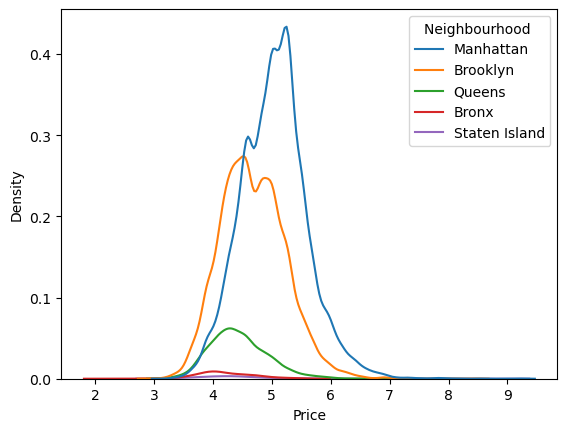

In [8]:
sns.kdeplot(x=q1['Price'], hue=q1['Neighbourhood '])
plt.show()

sns.kdeplot(x=np.log(q1['Price']), hue=q1['Neighbourhood '])
plt.show()

In [11]:
#2.
y = q1['Price']
X = pd.get_dummies(q1['Neighbourhood '], dtype='int')

from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y) 
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
results

#The means from part 1 are the same as the coefficient from this part. The coefficients in a regression of a continuous variable on one categorical variable is also the same as the mean because no other variables have an effect.  

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


In [12]:
#3 
y = q1['Price']
X = pd.get_dummies(q1['Neighbourhood '], dtype='int', drop_first = True)
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X,y)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
results

#The Bronx is now the intercept. To get the coefficients from the previous regression, add the regression coefficient values to the intercept. 

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [13]:
print(reg.intercept_)

75.2764976958471


In [14]:
4.
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = q1['Price']
X = q1.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=.2,
                                                    random_state=100) 

Z_train = pd.concat([X_train['Review Scores Rating'], 
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) 

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) 
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) 

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
results

#The most expensive property you can rent is a 100 rated place in Manhattan. 

Rsq:  0.06701086106947252
RMSE:  125.01092061382934


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [19]:
5.
y = q1['Price']
X = q1.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=.2, 
                                                    random_state=100)

Z_train = pd.concat([X_train['Review Scores Rating'], 
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) 
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) 
results

print("Most expensive property you can rent is $", 110.617 + 53.69 + 100 * 0.0626)


Rsq:  0.2203534812928234
RMSE:  114.27692123130632
Most expensive property you can rent is $ 170.567


In [ ]:
#6
#When we move to part5, another variable type is considered, room type. This explains the decrease in coefficient beacuse the predictive power of the review scores rating becomes less significant with this new variable.

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

<Axes: >

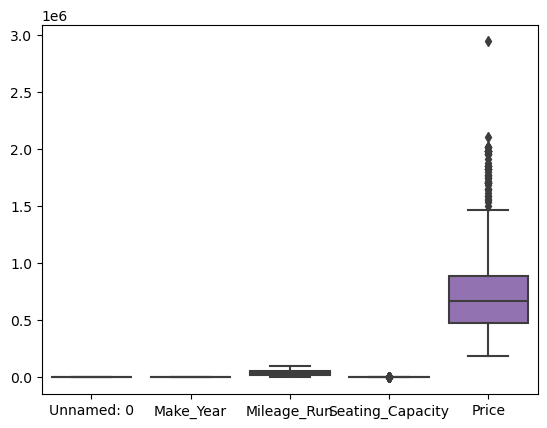

In [22]:
#1.
import pandas as pd
import numpy as np
import seaborn as sns

cars = pd.read_csv('/Users/nguyen/Desktop/Spring 24/DS 3001/Data/cars_hw.csv')
cars0 = cars 
sns.boxplot(data=cars)

<Axes: >

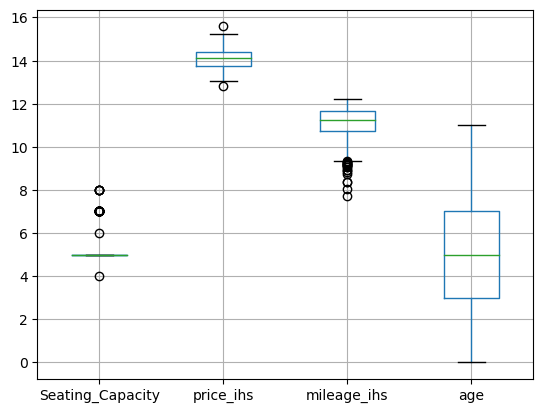

In [25]:
cars['price_ihs'] = np.arcsinh(cars['Price'])
cars['mileage_ihs'] = np.arcsinh(cars['Mileage_Run'])
cars['age'] = max(cars['Make_Year'])-cars['Make_Year']
cars = cars.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)
cars.boxplot()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


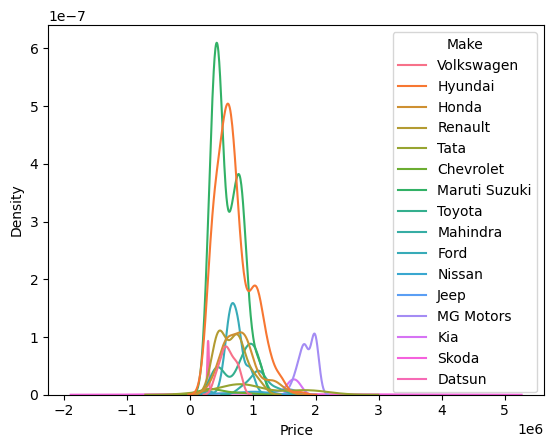

In [26]:
#2.
sns.kdeplot(data = cars0, x='Price',hue='Make')
cars0['Price'].groupby(cars0['Make']).describe()

#MG motor cars are the most expensive. Prices range from 188k to almost 3M.

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


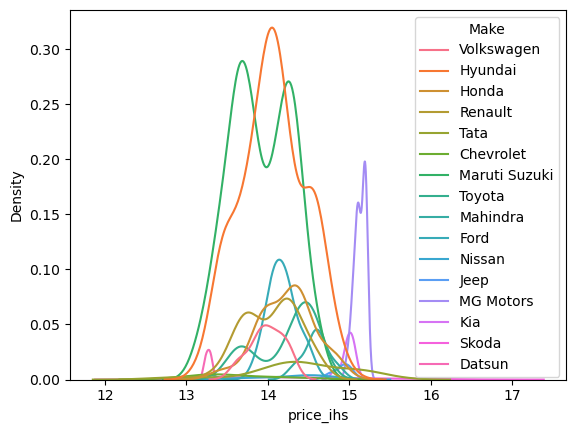

In [28]:
sns.kdeplot(data=cars,x='price_ihs',hue='Make')
cars['price_ihs'].groupby(cars['Make']).describe()

In [ ]:
sns.kdeplot(data=cars.loc[ cars['Make'].isin(['Maruti Suzuki','Toyota'])  ,:],x='price_ihs',hue='Make')

In [29]:
#3.
N = cars.shape[0]
df = cars.sample(frac=1, random_state=100) 
train_size = int(.8*N)

df_train = cars[0:train_size]
y_train = df_train['price_ihs']

df_test = cars[train_size:]
y_test = df_test['price_ihs']

In [30]:
#4.
from sklearn import linear_model

var_n = ['age','mileage_ihs','Seating_Capacity'] 
X_train_n = df_train.loc[:,var_n] 
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train) 
X_test_n = df_test.loc[:,var_n] 
y_hat = reg_n.predict(X_test_n)
print('Numeric only Rsq: ', reg_n.score(X_test_n,y_test)) 
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only RMSE: ', rmse_n) 

#The joint model with numeric and categorical variables performs the best. Expanding the set of features improved the performance of the model. 

Numeric only Rsq:  0.32815113492173875
Numeric only RMSE:  0.31674215264203737


In [ ]:
var_cat = ['Make','Body_Type','Color','Fuel_Type','Transmission','Transmission_Type']

dummies = pd.DataFrame([]) 
for var in var_cat: 
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True) 
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]

reg_c = linear_model.LinearRegression().fit(X_train_c,y_train) 
y_hat_c = reg_c.predict(X_test_c)
print('Categorical only Rsq: ', reg_c.score(X_test_c,y_test)) 
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only RMSE: ', rmse_c) 

In [ ]:
X_train_all = pd.concat([X_train_n, X_train_c],axis=1, ignore_index=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1, ignore_index=True)

reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) 
y_hat_all = reg_all.predict(X_test_all)
print('All Rsq: ', reg_all.score(X_test_all,y_test)) 
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('All RMSE: ', rmse_all) 

In [ ]:
#5.
from sklearn.preprocessing import PolynomialFeatures

for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)

    Z = expander.fit_transform(X_test_n)
    names = expander.get_feature_names_out() 
    X_test_d = pd.DataFrame(data=Z, columns = names)
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out() 
    X_train_d = pd.DataFrame(data=Z, columns = names) 
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)

    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)

    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) 
    print(d, ' Rsq: ', reg_all.score(X_test_all,y_test)) 
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all) 
    
    #The best degree is 2, an rsq of .74 and RMSE of .196. After that, performance falls. 

In [ ]:
#6. 

d = 2

expander = PolynomialFeatures(degree=d,include_bias=False)
Z = expander.fit_transform(X_test_n)
names = expander.get_feature_names_out() 
X_test_d = pd.DataFrame(data=Z, columns = names) 

Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out() 
X_train_d = pd.DataFrame(data=Z, columns = names) 

X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_c], axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_c], axis=1)
X_test_all.columns = X_test_all.columns.astype(str)
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train) 
y_hat_all = reg_all.predict(X_test_all)
residuals = y_test - y_hat_all

sns.scatterplot(x=y_test,y=y_hat_all)

In [ ]:
sns.kdeplot(residuals)

In [ ]:
from sklearn import tree 

X_train_n.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_n, X_train_c],axis=1)
X_train_all.columns = X_train_all.columns.astype(str)
X_test_n.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_n, X_test_c],axis=1)
X_test_all.columns = X_test_all.columns.astype(str)
sup_depth = 20
for d in np.arange(2,sup_depth):
    model = tree.DecisionTreeRegressor(max_depth=d) 
    cart = model.fit(X_train_all, y_train) 
    cart.score(X_test_all,y_test)
    y_hat = cart.predict(X_test_all)
    rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
    print('Depth: ', d, ', RMSE: ', rmse, ', Rsq: ', cart.score(X_test_all,y_test)) 

In [ ]:
#There are two little peaks, signaling a slight bi modal. There is also a slight left tail. Other than that, the curve is relatively bell shaped. 